(285, 8)
Filtered dataset: 285 rules remain after dropping body size > 40

--- Data Inspection ---
First 5 rows:
                                                Rule  Head Coverage  \
0  ?a  ANATOMY_DISEASE  ?g  ?g  TEST_DISEASE  ?b ...       0.020716   
1  Headache  ADE_DRUG  ?a  Glycated hemoglobin (H...       0.025503   
2  Weight gain  ADE_DRUG  ?a  Blood lipid test  T...       0.037584   
3  ?a  ANATOMY_DISEASE  ?n  Basal insulin  DRUG_D...       0.022599   
4  ?a  ANATOMY_DISEASE  ?n  Basal insulin  DRUG_D...       0.022599   

   Std Confidence  PCA Confidence  Positive Examples  Body size  \
0        0.785714        0.846154                 11         14   
1        0.760000        0.760000                 19         25   
2        0.700000        0.823529                 28         40   
3        0.750000        1.000000                 12         16   
4        0.750000        1.000000                 12         16   

   PCA Body size Functional variable  
0             13  

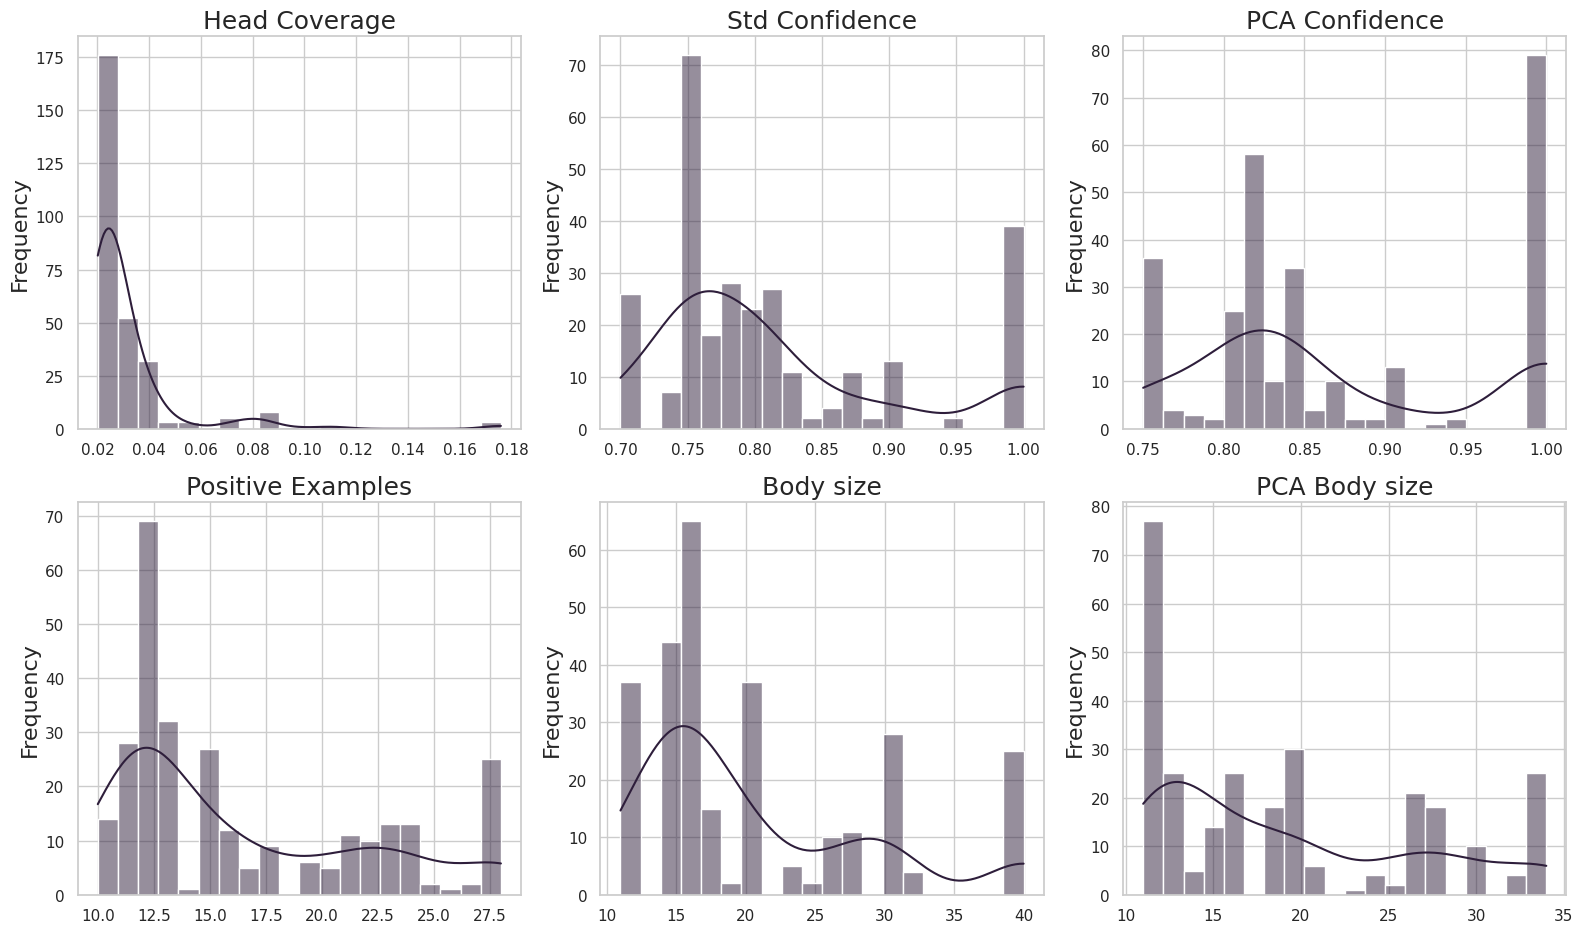



--- Generating Correlation and Confidence Plots ---


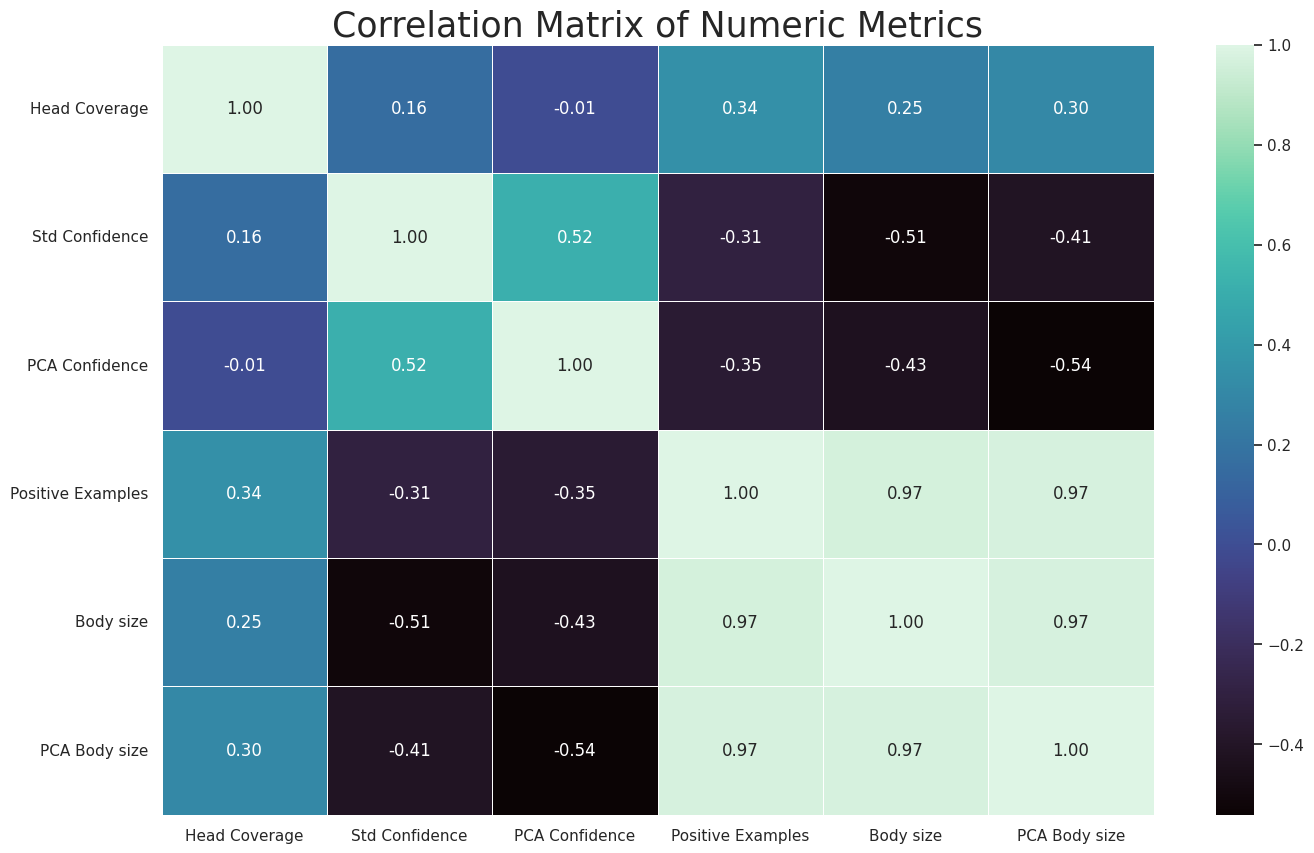

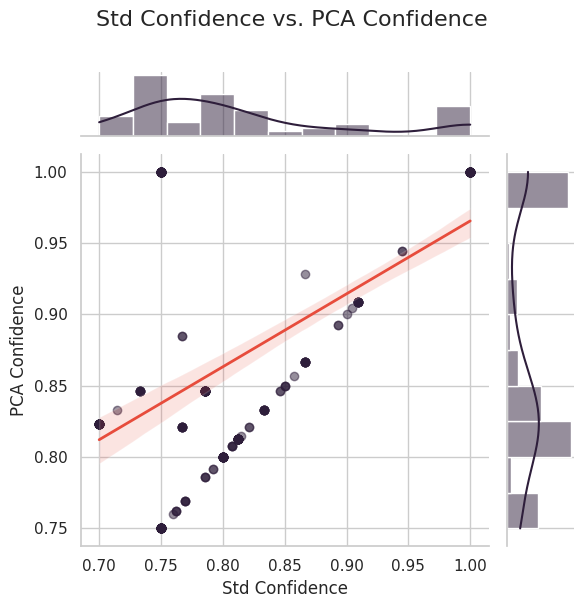



--- Top Rules Analysis ---
Top 10 rules by Head Coverage:
                                                                                                                                                                                           Rule  Head Coverage
121                                                                        ?m  OPERATION_DISEASE  ?b  ?a  PATHOGENESIS_DISEASE  ?h  ?m  TREATMENT_DISEASE  ?h   => ?a  PATHOGENESIS_DISEASE  ?b       0.175926
119                                                                        ?m  OPERATION_DISEASE  ?h  ?a  PATHOGENESIS_DISEASE  ?h  ?m  TREATMENT_DISEASE  ?b   => ?a  PATHOGENESIS_DISEASE  ?b       0.175926
120                                                                             ?a  PATHOGENESIS_DISEASE  ?h  ?m  REASON_DISEASE  ?h  ?m  SYMPTOM_DISEASE  ?b   => ?a  PATHOGENESIS_DISEASE  ?b       0.175926
284                                                                                        ?m  OPERATION_DISEASE

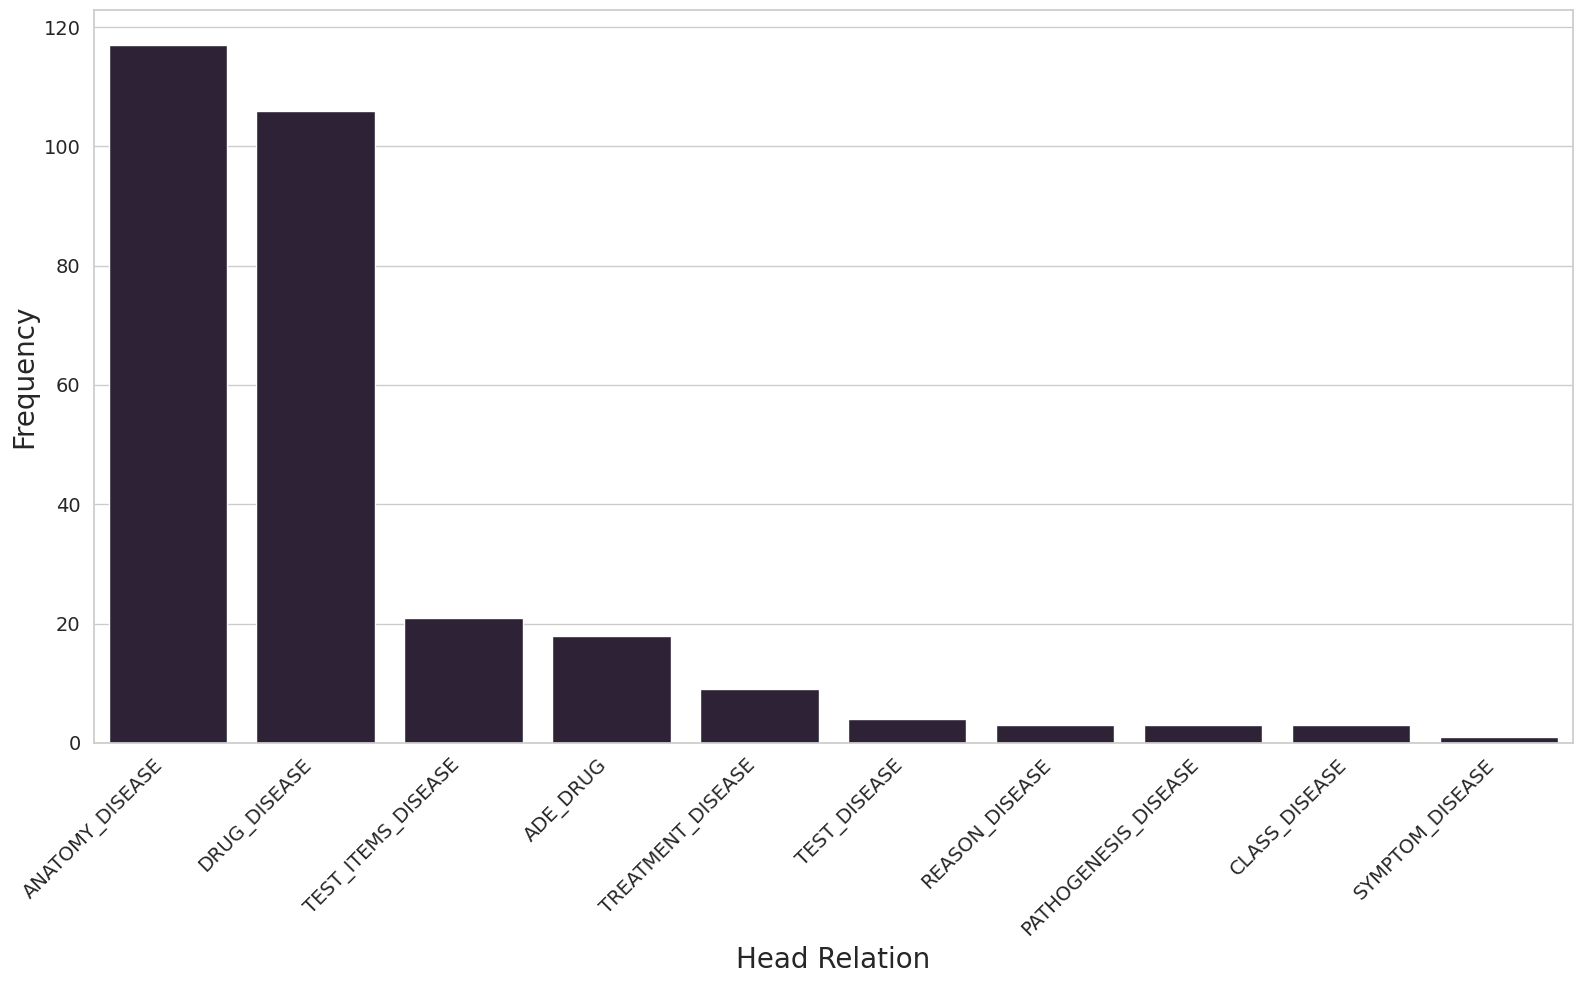



Exploratory analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

def inspect_data(df):
    """Prints the head and data types of the DataFrame."""
    print("--- Data Inspection ---")
    print("First 5 rows:")
    print(df.head(), end="\n\n")
    print("Data types:")
    print(df.dtypes, end="\n\n")

def print_summary_stats(df, numeric_cols):
    """Computes and prints summary statistics for numeric fields."""
    print("--- Summary Statistics ---")
    print(df[numeric_cols].describe(), end="\n\n")

def plot_metric_distributions(df, numeric_cols):
    """
    Plots the distributions of all numeric metrics in a single figure
    with a unified style.
    """
    print("--- Generating Metric Distribution Plots ---")
    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    #fig.suptitle('Distributions of Rule Metrics', fontsize=25, y=0.95)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
        axes[i].set_title(col, fontsize=18)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    print("\n" + "="*50 + "\n")


def plot_confidence_correlation(df, numeric_cols):
    """
    Creates a more advanced joint plot for confidence correlation and a heatmap.
    """
    print("--- Generating Correlation and Confidence Plots ---")
    # Correlation Matrix Heatmap
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(16, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt='.2f', linewidths=.5)
    plt.title('Correlation Matrix of Numeric Metrics', fontsize=25)
    plt.show()

    # Joint plot for a detailed view of Std vs. PCA Confidence
    g = sns.jointplot(data=df, x='Std Confidence', y='PCA Confidence',
                      kind='reg', # Add a regression line
                      joint_kws={'scatter_kws': {'alpha': 0.5}},
                      line_kws={"color": "#e74c3c", "linewidth": 2})
    g.fig.suptitle('Std Confidence vs. PCA Confidence', y=1.01, fontsize=16)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")


def print_top_rules(df):
    """Identifies and prints top rules by various metrics."""
    print("--- Top Rules Analysis ---")
    for metric in ['Head Coverage', 'Std Confidence', 'PCA Confidence', 'Positive Examples']:
        print(f"Top 10 rules by {metric}:")
        top = df.sort_values(metric, ascending=False).head(20)
        # Use to_string() for better formatting of long rule texts
        print(top[['Rule', metric]].to_string(), end="\n\n")
    print("\n" + "="*50 + "\n")


def plot_head_relation_distribution(df):
    """
    Analyzes and visualizes the distribution of rules per head relation.
    """
    print("--- Generating Head Relation Distribution Plot ---")
    # Extract the head relation from each rule
    # This handles multi-word subjects/objects correctly
    df['Head relation'] = df['Rule'].str.split('=>').str[1].str.strip().str.split().str[1]

    # Count rules per head relation
    head_counts = df['Head relation'].value_counts()

    print("Rule counts per head relation:")
    print(head_counts, end="\n\n")

    # Plot the distribution
    plt.figure(figsize=(16, 10))
    sns.barplot(x=head_counts.index, y=head_counts.values)
    #plt.title('Number of Rules per Head Relation', fontsize=25)
    plt.xlabel('Head Relation', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")


def main():
    """Main function to run the analysis."""
    # Set a professional theme for all plots
    sns.set_theme(style="whitegrid", palette="mako")

    # 1. Load the data
    try:
        df = pd.read_csv('/content/drive/MyDrive/THESIS/filteredrules-final.csv')
    except FileNotFoundError:
        print("Error: 'filteredrules-final.csv' not found. Please make sure the file is in the same directory.")
        return

    print(df.shape)
    # Filtering
    df = df[(df['Body size'] <= 40) & (df['Positive Examples'] >= 10)].reset_index(drop=True)
    print(f"Filtered dataset: {df.shape[0]} rules remain after dropping body size > 40\n")

    numeric_cols = ['Head Coverage', 'Std Confidence', 'PCA Confidence',
                    'Positive Examples', 'Body size', 'PCA Body size']

    # Run analyses
    inspect_data(df)
    print_summary_stats(df, numeric_cols)
    plot_metric_distributions(df, numeric_cols)
    plot_confidence_correlation(df, numeric_cols)
    print_top_rules(df)
    plot_head_relation_distribution(df)

    print("Exploratory analysis complete.")

if __name__ == '__main__':
    main()